### Fake news detector "TEXT" model

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read the data 
train = pd.read_csv(r"D:\new Data science class\project\capstone 2_dl-NLP-fake news\train.csv")

In [3]:
# Drop nulls 
train = train.dropna()

In [4]:
# Get the Dependent feature

X_train=train.drop('label',axis=1)
y_train=train['label']

In [5]:
# Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset

messages = X_train.copy()
messages.reset_index(inplace=True)

In [6]:
# Importing libraries for pre processing 

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [13]:
# Preprocessing of text data

ps_text = PorterStemmer()
corpus_text = []
for i in range(0, len(messages)):
    print("Status: %s / %s" %(i, len(messages)), end="\r")
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps_text.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_text.append(review)

In [14]:
corpus_text[1]

'ever get feel life circl roundabout rather head straight line toward intend destin hillari clinton remain big woman campu leafi liber wellesley massachusett everywher els vote like inaugur dress remaind day way miss havisham forev wore wed dress speak great expect hillari rodham overflow year ago first address wellesley graduat class presid colleg inform gather student need debat far could ascertain spokesman kind like democrat primari minu term unknown even seven sister school glad miss adam made clear speak today us us miss rodham told classmat appoint edger bergen charli mccarthi mortim snerd attend bespectacl granni glass award matronli wisdom least john lennon wisdom took issu previou speaker despit becom first win elect seat u senat sinc reconstruct edward brook came critic call empathi goal protestor critic tactic though clinton senior thesi saul alinski lament black power demagogu elitist arrog repress intoler within new left similar word come republican necessit brief rebutt 

In [16]:
# One hot encoding 
from keras.preprocessing.text import one_hot
voc_size = 5000
onehot_rep = [one_hot(words, voc_size) for words in corpus]
onehot_rep[0]

[3649,
 3371,
 3884,
 2764,
 1474,
 4431,
 3517,
 813,
 1416,
 1183,
 4365,
 3197,
 4772,
 1547,
 813,
 1416,
 4004,
 803,
 55,
 2970,
 4681,
 2493,
 4403,
 2067,
 888,
 155,
 1229,
 1152,
 3388,
 375,
 1625,
 3781,
 442,
 3201,
 2428,
 1079,
 1475,
 2100,
 3452,
 4431,
 880,
 3649,
 1216,
 3884,
 2908,
 124,
 98,
 357,
 268,
 442,
 3201,
 3024,
 535,
 4431,
 1448,
 4654,
 3517,
 2132,
 1475,
 2908,
 3381,
 251,
 319,
 408,
 472,
 3381,
 181,
 4677,
 1216,
 1575,
 4841,
 509,
 4431,
 2444,
 4940,
 1183,
 3205,
 1217,
 4841,
 4498,
 357,
 4431,
 3081,
 1217,
 4498,
 1216,
 4677,
 2528,
 3649,
 3277,
 2313,
 4657,
 4841,
 388,
 3657,
 3381,
 673,
 2905,
 4231,
 1474,
 2008,
 4431,
 955,
 4401,
 3517,
 214,
 4657,
 4841,
 4036,
 813,
 1416,
 2083,
 4331,
 2428,
 4743,
 1183,
 1475,
 3252,
 955,
 1475,
 1427,
 3988,
 3381,
 4607,
 824,
 4554,
 1648,
 3914,
 813,
 1416,
 4710,
 4772,
 4975,
 357,
 1648,
 4431,
 3711,
 1546,
 3657,
 3381,
 3994,
 4149,
 1648,
 357,
 3342,
 2291,
 4726,
 1008

In [18]:
# Text padding 
from keras.preprocessing.sequence import pad_sequences
sent_length_text = 1000
embeded_docs_text = pad_sequences(onehot_rep_text,padding= 'pre',maxlen = sent_length_text)
embeded_docs_text[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [19]:
# final train data 
X_final_text=np.array(embeded_docs_text)
y_final_text=np.array(y_train)
X_final_text.shape,y_final_text.shape

((18285, 1000), (18285,))

In [20]:
# Train-test-split 
from sklearn.model_selection import train_test_split
x_train_text, x_test_text, y_train_text, y_test_text = train_test_split(X_final_text, y_final_text, test_size=0.25, random_state=42)

### LSTM_text_model_1

In [ ]:
import tensorflow
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [23]:
# Build lSTM_text_1 model
embedding_vector_feature = 100

# creating lstm model
model_text_1=Sequential()

# creating input layer
model_text_1.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length_text))

# adding lstm layer 
model_text_1.add(LSTM(200))

# adding output layer 
model_text_1.add(Dense(1,activation='sigmoid'))

# compiling the model 
model_text_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         500000    
_________________________________________________________________
lstm (LSTM)                  (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 741,001
Trainable params: 741,001
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# train model 1
history_text_1 = model_text_1.fit(x_train_text,y_train_text, validation_split=0.2, epochs=10, batch_size=256)

Epoch 1/10
43/43 [==============================] - 628s 15s/step - loss: 0.5035 - accuracy: 0.7535 - val_loss: 0.2457 - val_accuracy: 0.9008
Epoch 2/10
43/43 [==============================] - 761s 18s/step - loss: 0.1887 - accuracy: 0.9300 - val_loss: 0.2308 - val_accuracy: 0.9085
Epoch 3/10
43/43 [==============================] - 1443s 34s/step - loss: 0.1279 - accuracy: 0.9565 - val_loss: 0.2299 - val_accuracy: 0.9132
Epoch 4/10
43/43 [==============================] - 2261s 53s/step - loss: 0.0905 - accuracy: 0.9723 - val_loss: 0.2437 - val_accuracy: 0.9089
Epoch 5/10
43/43 [==============================] - 1011s 24s/step - loss: 0.0854 - accuracy: 0.9727 - val_loss: 0.2831 - val_accuracy: 0.8997
Epoch 6/10
43/43 [==============================] - 1044s 24s/step - loss: 0.0746 - accuracy: 0.9755 - val_loss: 0.2843 - val_accuracy: 0.9089
Epoch 7/10
43/43 [==============================] - 1053s 24s/step - loss: 0.1135 - accuracy: 0.9568 - val_loss: 0.3142 - val_accuracy: 0.8797
E

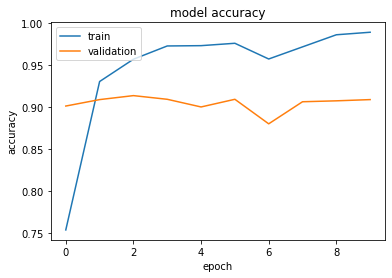

In [25]:
# summarize history for accuracy

plt.plot(history_text_1.history['accuracy'])
plt.plot(history_text_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

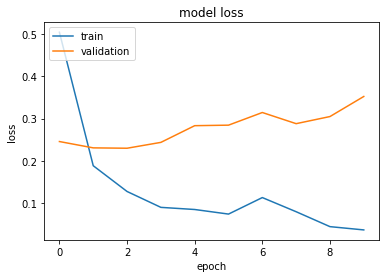

In [26]:
# summarize history for loss
plt.plot(history_text_1.history['loss'])
plt.plot(history_text_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import classification_report,accuracy_score

In [33]:
# Prediction on test data 
pred_text_1 = model_text_1.predict_classes(x_test_text)
cr_text_1 = classification_report(y_test_text,pred_text_1)
print(cr_text_1)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2600
           1       0.93      0.85      0.89      1972

    accuracy                           0.91      4572
   macro avg       0.91      0.90      0.91      4572
weighted avg       0.91      0.91      0.91      4572



In [42]:
score_text_1 = accuracy_score(y_test_text,pred_text_1)
score_text_1

0.9105424321959755

### LSTM_text_model_2 - adding dropout layer

In [37]:
from tensorflow.keras.layers import Dropout

#creating model using LSTM
model_text_2 = Sequential()

# creating embedding layer as input layer
model_text_2.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length_text))
model_text_2.add(Dropout(0.5))

#adding LSTM layers with 100 neurons
model_text_2.add(LSTM(100))
model_text_2.add(Dropout(0.3))

#adding output layer 
model_text_2.add(Dense(1,activation="sigmoid"))

#compiling the model
model_text_2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

print(model_text_2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# train model 2
history_text_2 = model_text_2.fit(x_train_text,y_train_text, validation_split=0.2, epochs=10, batch_size=256)

Epoch 1/10
43/43 [==============================] - 1552s 36s/step - loss: 0.5564 - accuracy: 0.7387 - val_loss: 0.3555 - val_accuracy: 0.8735
Epoch 2/10
43/43 [==============================] - 1464s 34s/step - loss: 0.2503 - accuracy: 0.9118 - val_loss: 0.2170 - val_accuracy: 0.9183
Epoch 3/10
43/43 [==============================] - 1588s 37s/step - loss: 0.1422 - accuracy: 0.9521 - val_loss: 0.2154 - val_accuracy: 0.9198
Epoch 4/10
43/43 [==============================] - 1427s 33s/step - loss: 0.1075 - accuracy: 0.9669 - val_loss: 0.2156 - val_accuracy: 0.9216
Epoch 5/10
43/43 [==============================] - 1142s 27s/step - loss: 0.0890 - accuracy: 0.9712 - val_loss: 0.2254 - val_accuracy: 0.9183
Epoch 6/10
43/43 [==============================] - 594s 14s/step - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.2652 - val_accuracy: 0.9209
Epoch 7/10
43/43 [==============================] - 594s 14s/step - loss: 0.0591 - accuracy: 0.9814 - val_loss: 0.2921 - val_accuracy: 0.9194
E

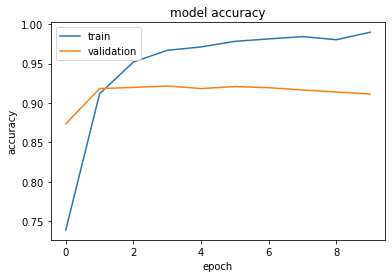

In [39]:
# summarize history for accuracy

plt.plot(history_text_2.history['accuracy'])
plt.plot(history_text_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

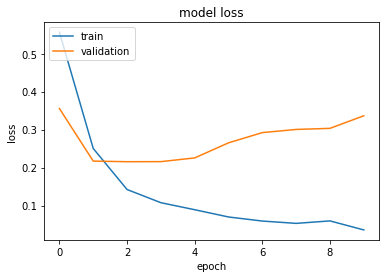

In [40]:
# summarize history for loss
plt.plot(history_text_2.history['loss'])
plt.plot(history_text_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
# Prediction on test data 
pred_text_2 = model_text_2.predict_classes(x_test_text)
cr_text_2 = classificati on_report(y_test_text,pred_text_2)
print(cr_text_2)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2600
           1       0.89      0.93      0.91      1972

    accuracy                           0.92      4572
   macro avg       0.91      0.92      0.92      4572
weighted avg       0.92      0.92      0.92      4572



In [43]:
score_text_2 = accuracy_score(y_test_text,pred_text_2)
score_text_2

0.9175415573053368

### Evaluation of text model 

In [ ]:
results_text = pd.DataFrame([["LSTM_text_model_1",score_text_1],["LSTM_text_model_2",score_text_2],columns =["Model","Accuracy"])

* LSTM model with drop out layer gives highest accuracy_score